# SVM challenge

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.svm import SVR

## The Dataset

This data comes from a Kaggle dataset that was uploaded by Epicurious. This dataset shows many food recipes and provides  ratings, nutrional values and which category they belong to and can be found on https://www.kaggle.com/hugodarwood/epirecipes/data

In [2]:
epi_data = pd.read_csv('epi_r.csv')

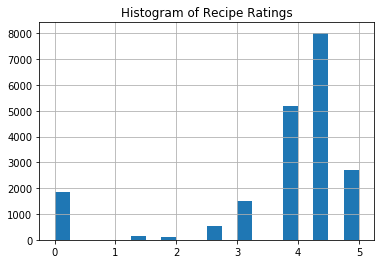

In [3]:
epi_data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

In [4]:
# Count nulls 
null_count = epi_data.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

In [5]:
epi_data.shape

(20052, 680)

In [6]:
epi_data.describe()

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
count,20052.000000,1.593500e+04,15890.000000,1.586900e+04,1.593300e+04,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,...,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000
mean,3.714467,6.322958e+03,100.160793,3.468775e+02,6.225975e+03,0.000299,0.000050,0.000848,0.001346,0.000349,...,0.001247,0.026332,0.000050,0.000299,0.014861,0.000150,0.000349,0.001396,0.000948,0.022741
std,1.340829,3.590460e+05,3840.318527,2.045611e+04,3.333182e+05,0.017296,0.007062,0.029105,0.036671,0.018681,...,0.035288,0.160123,0.007062,0.017296,0.121001,0.012231,0.018681,0.037343,0.030768,0.149080
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,1.980000e+02,3.000000,7.000000e+00,8.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.375000,3.310000e+02,8.000000,1.700000e+01,2.940000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.375000,5.860000e+02,27.000000,3.300000e+01,7.110000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,3.011122e+07,236489.000000,1.722763e+06,2.767511e+07,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Data Cleaning

In [65]:
new_data = epi_data.drop(['title', 'calories', 'protein', 'fat', 'sodium'], 1)
sorted = new_data.sum().sort_values(ascending=False)

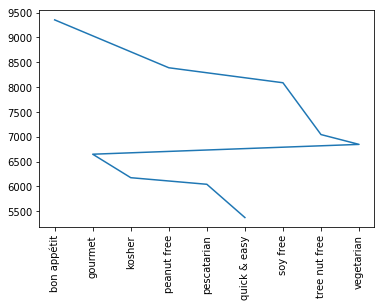

In [63]:
# this shows a list of the most common keywords used to categorize the recipes. bon appétit was in over 
# 9,000 recipes of the 20,052.
plt.plot(sorted[1:10])
plt.xticks(rotation = 90);

## The challenge begins

In [10]:
# Turn target variable into classification.  I chose the median which was 4.375 and am rating everything 4.375 and higher as a good recipe.
new_data['good'] = new_data['rating'] >= 4.375

In [11]:
def bestPCA(most_features, X, y):
    for i in range(1, most_features):
        best_results = 0
        best_num_fea = 0
        y = y
        pca = PCA(n_components=i)
        pca.fit(X)
        X_pca = pca.transform(X)
        svc = SVC()
        svc.fit(X_pca, y)
        score = svc.score(X_pca, y)
        plt.scatter(i, score)
        if score > best_results:
            best_results = score
            best_num_fea = i
    print(best_num_fea, best_results)
    plt.show()

29 1.0


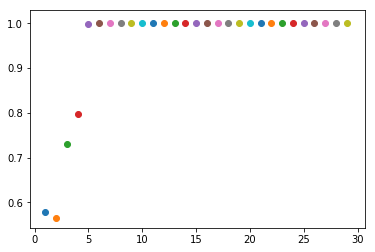

In [12]:
# You said lineplots were better but everytime I did one the graph is blank, is there something I am doing wrong?
X = new_data.drop(['rating'], 1)
y = new_data['good']
bestPCA(30, X, y)

In [87]:
# PCA for SVR 
def bestPCA1(most_features, X, y):
    for i in range(1, most_features):
        best_results = 0
        best_num_fea = 0
        pca = PCA(n_components=i)
        pca.fit(X)
        X1_pca = pca.transform(X)
        svr = SVR()
        svr.fit(X1_pca, y)
        score = svr.score(X1_pca, y)
        plt.scatter(i, score)
        if score > best_results:
            best_results = score
            best_num_fea = i
    print(best_num_fea, best_results)
    plt.show()

0 0


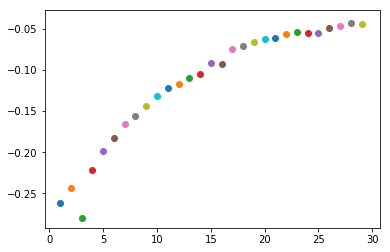

In [88]:
# You said lineplots were better but everytime I did one the graph is blank, is there something I am doing wrong?
bestPCA1(30, X, y)

In [13]:
pca = PCA(n_components=29)
pca.fit(X)
X_pca = pca.transform(X)
svc = SVC()
svc.fit(X_pca, y)
svc.score(X_pca, y)

1.0

In [14]:
kern = ['rbf', 'poly', 'linear', 'sigmoid']
def best_kernel(kern, X, y):
    for i in kern:
        best_score = 0
        best_kern = 0
        svc = SVC(kernel = i)
        svc.fit(X_pca, y)
        results = svc.score(X_pca, y)
        plt.scatter(i, results)
        if results> best_score:
            best_kern = i
            best_score = results
        plt.show()
        print(best_kern, best_score)

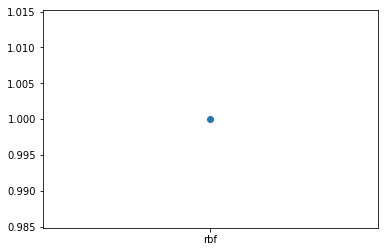

rbf 1.0


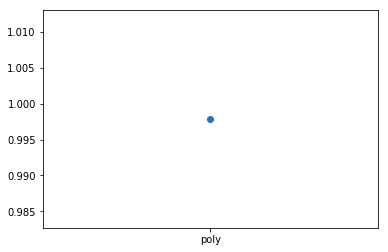

poly 0.997855575504


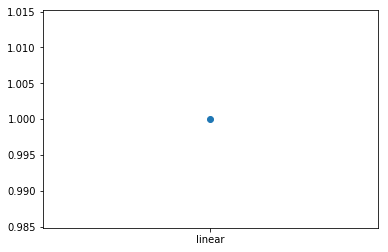

linear 1.0


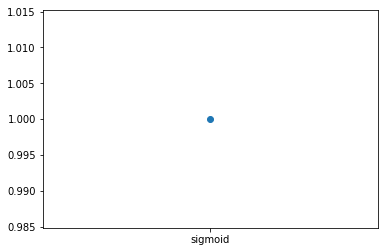

sigmoid 1.0


In [15]:
best_kernel(kern, X, y)

In [ ]:
svc = SVC(kernel = 'rbf')
svc.fit(X_pca, y)
svc.score
cross_val_score(svc, X_pca, y, cv=5)

## Feature Selection by popularity and recursion

In [16]:
# Sort keywords by value count and selected the 30 most popular
keywords = new_data.drop(['rating', 'good'], 1).sum().sort_values(ascending=False)

# Select top 30 words and store in list
keywords = keywords[:30].index.tolist()

feature selection through recursion

In [92]:
def recursion_feature_elim(svc, X, y):
    begin_score = svc.fit(X, y)
    new_X = []
    for i in X:
        df = X.drop(i, 1)
        best_score = begin_score
        svc.fit(df, y)
        results = svc.score(df, y)
        if results < best_score:
            best_score = results
            new_X += i
    print(new_X)

In [32]:
X= new_data[keywords]

In [93]:
recursion_feature_elim(svc, X, y)

TypeError: '<' not supported between instances of 'float' and 'SVC'

In [ ]:
new_keywords = new_data[]
X = new_data[new_keywords]

In [ ]:
cross_val_score(svc, X, y, cv=5)